# Librerías

In [9]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
import statsmodels.api as sm

# Carga del Dataset

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis', 'Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean', 'Smoothness Mean', 
           'Compactness Mean', 'Concavity Mean', 'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean', 
           'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 
           'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE', 'Radius Worst', 
           'Texture Worst', 'Perimeter Worst', 'Area Worst', 'Smoothness Worst', 'Compactness Worst', 
           'Concavity Worst', 'Concave Points Worst', 'Symmetry Worst', 'Fractal Dimension Worst']

# Leer los datos
data = pd.read_csv(url, header=None, names=columns)

# EDA

In [11]:
data.describe()

,ID,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='Radius Mean', ylabel='Count'>

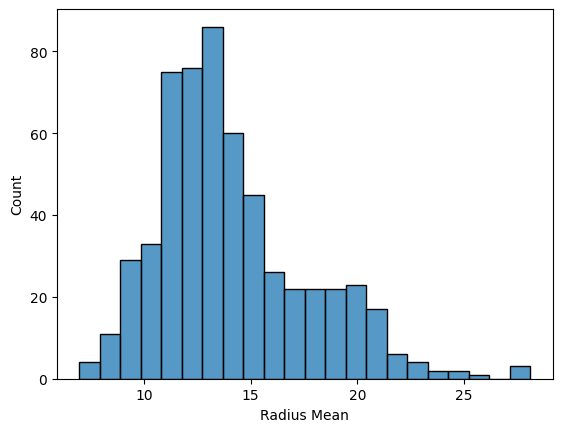

In [14]:
sns.histplot(data=data, x="Radius Mean")

<Axes: xlabel='Area Mean', ylabel='Count'>

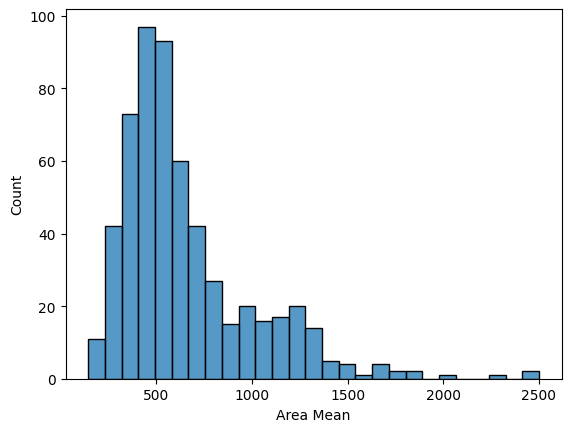

In [13]:
sns.histplot(data=data, x="Area Mean")

# Tratamiento de variables y definición de datasets train/test

In [3]:
#convertir la primera columna "Diagnosis" a variable binaria 
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['Radius Mean', 'Texture Mean', 'Perimeter Mean', 'Area Mean', 'Smoothness Mean', 
           'Compactness Mean', 'Concavity Mean', 'Concave Points Mean', 'Symmetry Mean', 'Fractal Dimension Mean', 
           'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 'Compactness SE', 
           'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE', 'Radius Worst', 
           'Texture Worst', 'Perimeter Worst', 'Area Worst', 'Smoothness Worst', 'Compactness Worst', 
           'Concavity Worst', 'Concave Points Worst', 'Symmetry Worst', 'Fractal Dimension Worst']]
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#shape del conjunto de entrenamiento y prueba
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


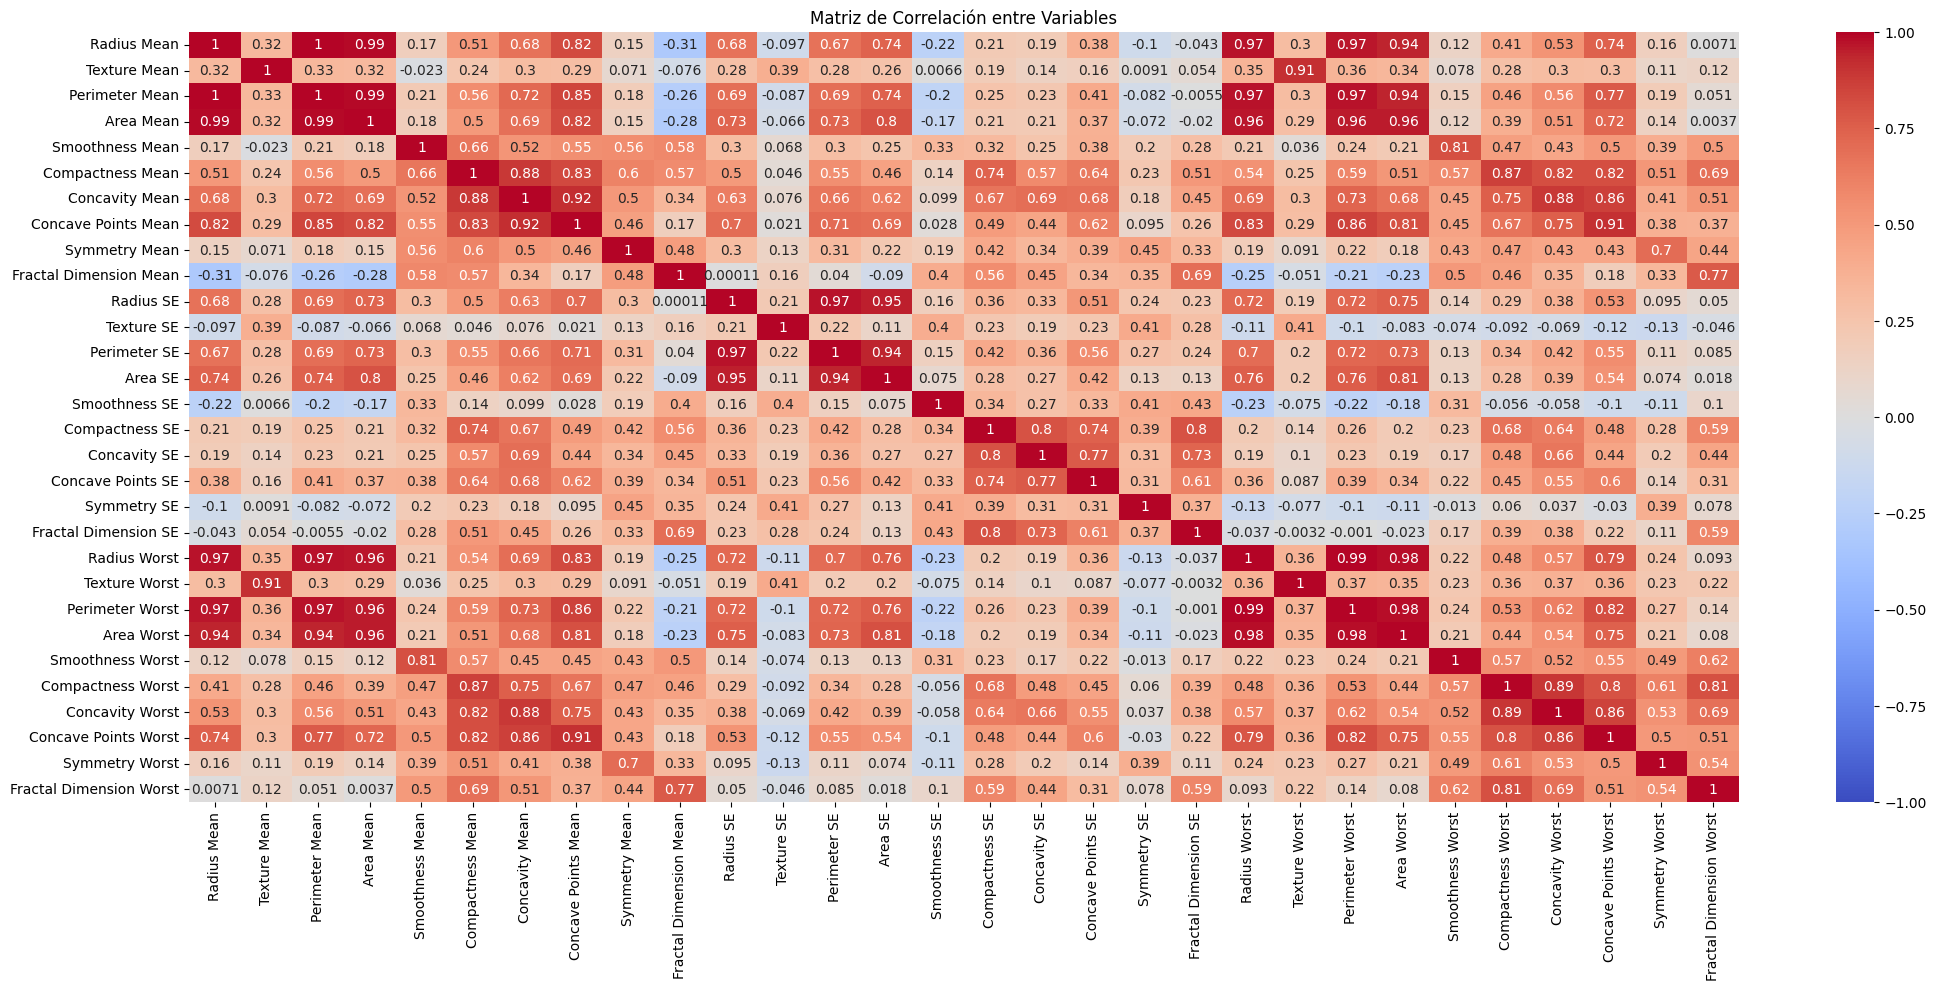

In [20]:
plt.figure(figsize=(25,10))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.show()

<Axes: xlabel='Area Worst', ylabel='Area Mean'>

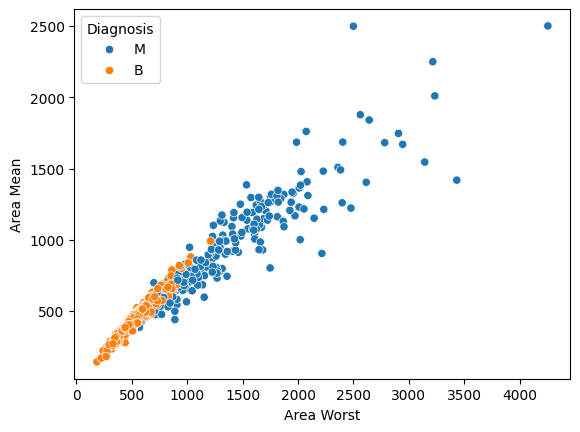

In [22]:
sns.scatterplot(x="Area Worst", y="Area Mean", hue="Diagnosis", sizes=(50, 200), data=data)

# Modelo

In [27]:
# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=10000)  # Aumenta el número de iteraciones
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Aumentar el umbral de 0.5 a 0.7
# Estoy siendo más exigente, a partir de 0.7 prediciré 1, más abajo de 0.7 predeciré 0
y_prob = modelo.predict_proba(X_test)[:, 1]
umbral = 0.7
y_pred2 = (y_prob >= umbral).astype(int)  # Clasificar como 1 si la probabilidad es mayor o igual al umbral

# Obtener los coeficientes del modelo
coefficients = np.append(modelo.intercept_, modelo.coef_) 
print("Intercepto del modelo", modelo.intercept_)
print("Coeficientes del modelo", modelo.coef_)

Intercepto del modelo [-29.44738662]
Coeficientes del modelo [[-0.7149613  -0.16779425  0.22654303 -0.02522269  0.14049541  0.17656154
   0.37617117  0.21039353  0.27461423  0.02805432  0.02796081 -1.00493746
   0.11072903  0.09882938  0.0123852  -0.06650103  0.02001196  0.0230152
   0.02664886 -0.01535078 -0.35794909  0.3809452   0.19824292  0.01143341
   0.25266141  0.56278662  1.17200332  0.45583448  0.59184283  0.08277468]]


# Validación - Umbral de 0.7

In [8]:
# umbral 0.7
# Tabla de confusión y otras métricas con sklearn
conf_matrix = confusion_matrix(y_test, y_pred2)

conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=['Real Negativo', 'Real Positivo'],  # Orden cambiado
                               columns=['Predicción Negativa', 'Predicción Positiva'])  # Orden cambiado
print("\nTabla de Confusión con sklearn:")
print(conf_matrix_df)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred2))
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred2))

y_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob)
print(f"El área bajo la curva ROC (AUC) es: {roc_auc:.2f}")



Tabla de Confusión con sklearn:
               Predicción Negativa  Predicción Positiva
Real Negativo                  104                    4
Real Positivo                    2                   61

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Exactitud (Accuracy): 0.9649122807017544
El área bajo la curva ROC (AUC) es: 1.00


In [34]:
# Si es 1 --> El tumor es maligno 
y_test

# El individuo 
y_test.index
print(y_test)

X_test.index
print(X_test)

512    1
457    0
439    0
298    0
37     0
      ..
7      1
408    1
523    0
361    0
553    0
Name: Diagnosis, Length: 171, dtype: int64
     Radius Mean  Texture Mean  Perimeter Mean  Area Mean  Smoothness Mean  \
512       13.400         20.52           88.64      556.7          0.11060   
457       13.210         25.25           84.10      537.9          0.08791   
439       14.020         15.66           89.59      606.5          0.07966   
298       14.260         18.17           91.22      633.1          0.06576   
37        13.030         18.42           82.61      523.8          0.08983   
..           ...           ...             ...        ...              ...   
7         13.710         20.83           90.20      577.9          0.11890   
408       17.990         20.66          117.80      991.7          0.10360   
523       13.710         18.68           88.73      571.0          0.09916   
361       13.300         21.57           85.24      546.1          0.08582   


# Validación - Umbral por defecto

In [6]:
# Tabla de confusión y otras métricas con sklearn
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=['Real Negativo', 'Real Positivo'],  # Orden cambiado
                               columns=['Predicción Negativa', 'Predicción Positiva'])  # Orden cambiado
print("\nTabla de Confusión con sklearn:")
print(conf_matrix_df)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))

y_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob)
print(f"El área bajo la curva ROC (AUC) es: {roc_auc:.2f}")



Tabla de Confusión con sklearn:
               Predicción Negativa  Predicción Positiva
Real Negativo                  102                    6
Real Positivo                    1                   62

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       108
           1       0.91      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Exactitud (Accuracy): 0.9590643274853801
El área bajo la curva ROC (AUC) es: 1.00


# Predicciones

In [7]:
# Para los datos de test, obtener las probabilidades de predicción con sklearn.
y_prob = modelo.predict_proba(X_test)[:, 1]
print("\nProbabilidades de predicción con sklearn:")
y_prob_df = pd.DataFrame(y_prob)
print(y_prob_df.head())
print(X_test.head())


Probabilidades de predicción con sklearn:
          0
0  0.994500
1  0.033596
2  0.001957
3  0.157198
4  0.000049
     Radius Mean  Texture Mean  Perimeter Mean  Area Mean  Smoothness Mean  \
512        13.40         20.52           88.64      556.7          0.11060   
457        13.21         25.25           84.10      537.9          0.08791   
439        14.02         15.66           89.59      606.5          0.07966   
298        14.26         18.17           91.22      633.1          0.06576   
37         13.03         18.42           82.61      523.8          0.08983   

     Compactness Mean  Concavity Mean  Concave Points Mean  Symmetry Mean  \
512           0.14690         0.14450              0.08172         0.2116   
457           0.05205         0.02772              0.02068         0.1619   
439           0.05581         0.02087              0.02652         0.1589   
298           0.05220         0.02475              0.01374         0.1635   
37            0.03766         0

# Curva ROC

[           inf 1.00000000e+00 9.32430298e-01 9.21377008e-01
 8.23845430e-01 7.29031150e-01 6.70903195e-01 2.38203874e-01
 2.33365285e-01 2.33097091e-06]


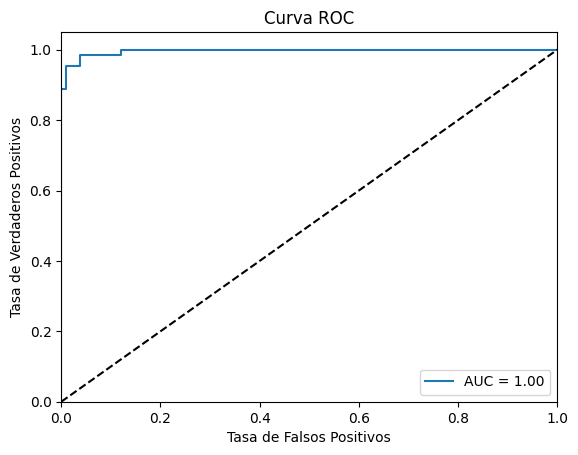

In [8]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print(thresholds)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

plt.legend(loc="lower right")
plt.show()

# Supuestos del modelo